# Applied Statistics Assessment

In [266]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math as math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea

The original *Lady Tasting Tea* experiment was first described by Ronald Fisher in his book *The Design of Experiments* (1935) [Wikipedia](https://en.wikipedia.org/wiki/The_Design_of_Experiments).  
The purpose of the experiment was to test a woman’s claim that she could determine whether milk had been poured into a cup before or after the tea, simply by taste.

In the original setup, there were eight cups in total, four with milk poured first and four with tea poured first.  
The woman was asked to identify which cups were prepared by each method. Fisher calculated that there was roughly a 1 in 70 chance of correctly identifying all four milk-first cups purely by guessing.


In this problem, the *Lady tasting tea* experiment will be slightly modified to 12 cups: 8 tea-first and 4 milk-first. The experiemnt will be simulated using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. The results will then be compared to the original 8-cup experiment.

### Cups of Tea(12-Cup experiment)

The Lady Tasting Tea experiment to 12 cups: 8 tea-first and 4 milk-first.
To start, the number of ways to select the 4 milk-first cups from the 12 total cups will be calculated.

In [267]:
# Number of cups in total
no_cups = 12

# Number of milk-first cups
no_cups_milk_first = 4

# Number of tea-first cups
no_cups_tea_first = 8

In [268]:
# Number of ways of selecting 4 milk-first cups from 12
ways = math.comb(no_cups, no_cups_milk_first)
print(f"There are {ways} ways of selecting 4 milk-first cups from 12.")

There are 495 ways of selecting 4 milk-first cups from 12.


Label the twelve cups: 1 2 3 4 5 6 7 8 9 10 11 12.  

We select four cups to have milk first.  
For example, cups 2, 5, 8, and 12 might be chosen.  

Visualizing placeholders for the milk-first cups:

Cups: 1 2 3 4 5 6 7 8 9 10 11 12  
Placeholders: _ _ _ _

In [269]:
# Total number of ways of selecting four cups in order
ways_ordered = 12 * 11 * 10 * 9
ways_ordered

11880

In [270]:
# Number of ways of shuffling the 4 selected cups
no_shuffles = 4 * 3 * 2 * 1
no_shuffles

24

In [271]:
# Number of combinations ignoring order
no_combs = ways_ordered // no_shuffles
no_combs

495

Formula

In mathematics, the math.comb() function is called the choose function.

It is written and calculated as

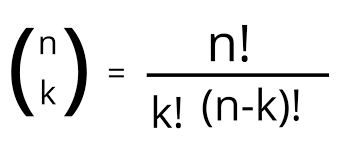

In [272]:


# Number of cups of tea in total.
n = 12



In [273]:


# Number of cups of tea with milk in first.
k = 4




math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as n!.

Multiply all positive integers from n down to 1.

n! = n x (n - 1) x (n - 2) x ... x 1

e.g. 5! = 5 x 4 x 3 x 2 x 1 = 120


In [274]:
# Twelve factorial.
math.factorial(n)

479001600

In [275]:
# Four factorial.
math.factorial(k)

24

In [276]:
# Four factorial.
math.factorial(n - k)

40320

In [277]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 4 x 3 x 2 x 1
(n - k)! = 4 x 3 x 2 x 1
n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (4 x 3 x 2 x 1) = 12 x 11 x 10 x 9

### Explanation

We’re using the **combination formula** to find how many ways we can choose 4 milk-first cups from 12 total cups:

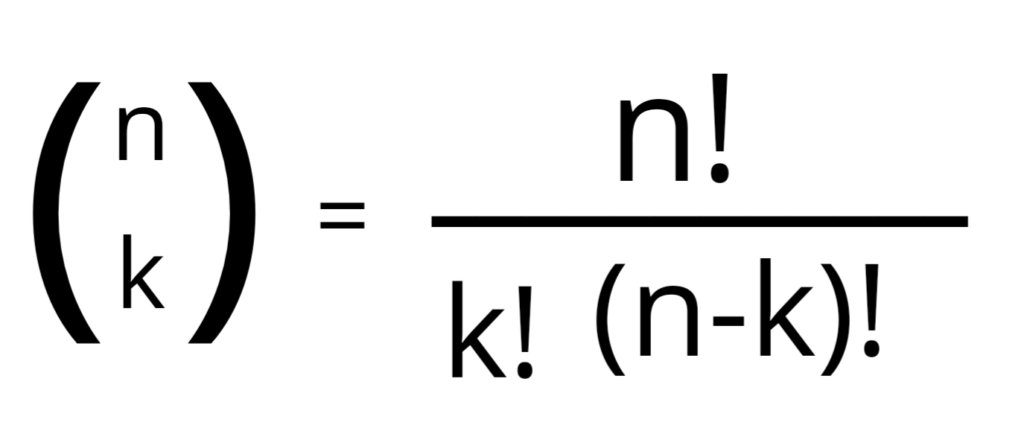


\[
\binom{n}{k} = \frac{n!}{k! (n - k)!}
\]

---

1. **Expand the factorials**

   - \( n! \) (12 factorial) means multiply all numbers from 12 down to 1.  
     This represents all possible arrangements of 12 cups.

     \[
     n! = 12 × 11 × 10 × 9 × 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1
     \]

   - \( k! \) (4 factorial) is the number of ways to arrange the 4 milk-first cups.

     \[
     k! = 4 × 3 × 2 × 1
     \]

   - \( (n - k)! \) (8 factorial) is the number of ways to arrange the remaining 8 tea-first cups.

     \[
     (n - k)! = 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1
     \]

---

2. **Cancel out the common terms**

   When dividing \( n! \) by \( (n - k)! \), everything from 8 down to 1 cancels out, leaving only:

   \[
   \frac{n!}{(n - k)!} = 12 × 11 × 10 × 9
   \]

   This step shows the number of ways to choose 4 cups in order.

---

3. **Divide by \( k! \)**

   Because order doesn’t matter (we only care which 4 are milk-first, not the order we picked them),  
   we divide by \( k! \):

   \[
   C(12, 4) = \frac{12 × 11 × 10 × 9}{4 × 3 × 2 × 1} = \frac{11880}{24} = 495
   \]

   So there are **495 possible combinations** of 4 milk-first cups among 12.

---

4. **Find the probability of guessing all correctly**

   If the participant guesses randomly, only **1** of those 495 possible arrangements is correct.

   \[
   P= 1/495 ≈ 0.00202
   \]

   That’s about **0.2%**, meaning there’s only a 1 in 495 chance of getting them all right by luck.


In [278]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [279]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [280]:
# Number of combinations.
len(combs)

495

In [281]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 3, 8, 9]

In [282]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 3, 8, 9}

In [283]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {0, 3}
(0, 1, 2, 4) 1 {0}
(0, 1, 2, 5) 1 {0}
(0, 1, 2, 6) 1 {0}
(0, 1, 2, 7) 1 {0}
(0, 1, 2, 8) 2 {0, 8}
(0, 1, 2, 9) 2 {0, 9}
(0, 1, 2, 10) 1 {0}
(0, 1, 2, 11) 1 {0}
(0, 1, 3, 4) 2 {0, 3}
(0, 1, 3, 5) 2 {0, 3}
(0, 1, 3, 6) 2 {0, 3}
(0, 1, 3, 7) 2 {0, 3}
(0, 1, 3, 8) 3 {0, 8, 3}
(0, 1, 3, 9) 3 {0, 9, 3}
(0, 1, 3, 10) 2 {0, 3}
(0, 1, 3, 11) 2 {0, 3}
(0, 1, 4, 5) 1 {0}
(0, 1, 4, 6) 1 {0}
(0, 1, 4, 7) 1 {0}
(0, 1, 4, 8) 2 {0, 8}
(0, 1, 4, 9) 2 {0, 9}
(0, 1, 4, 10) 1 {0}
(0, 1, 4, 11) 1 {0}
(0, 1, 5, 6) 1 {0}
(0, 1, 5, 7) 1 {0}
(0, 1, 5, 8) 2 {0, 8}
(0, 1, 5, 9) 2 {0, 9}
(0, 1, 5, 10) 1 {0}
(0, 1, 5, 11) 1 {0}
(0, 1, 6, 7) 1 {0}
(0, 1, 6, 8) 2 {0, 8}
(0, 1, 6, 9) 2 {0, 9}
(0, 1, 6, 10) 1 {0}
(0, 1, 6, 11) 1 {0}
(0, 1, 7, 8) 2 {0, 8}
(0, 1, 7, 9) 2 {0, 9}
(0, 1, 7, 10) 1 {0}
(0, 1, 7, 11) 1 {0}
(0, 1, 8, 9) 3 {0, 8, 9}
(0, 1, 8, 10) 2 {0, 8}
(0, 1, 8, 11) 2 {0, 8}
(0, 1, 9, 10) 2 {0, 9}
(0, 1, 9, 11) 2 {0, 9}
(0, 1, 10, 11) 1 {0}
(0, 2, 3, 4) 2 {0, 3}
(0, 2, 3, 5) 2 {0, 3}
(0

In [284]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

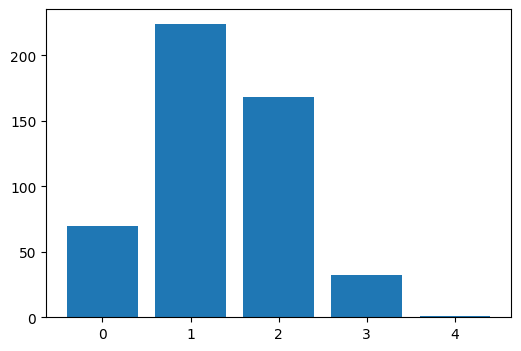

In [285]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.

In [286]:
import numpy as np

#https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

# Number of samples and sample size
n_samples = 100000
sample_size = 10

# Generate 100,000 samples of size 10 from standard normal
samples = np.random.normal(size=(n_samples, sample_size))

# Show the first 5 samples just to check
print(samples[:5])

[[-0.13736036  0.82694227  1.15194637  1.44628344 -1.40447198  0.19662778
   0.72480595 -1.26828023  0.548782    0.13117273]
 [-1.0904832  -0.44576013 -1.18232367  0.49864997  0.0815315   0.60005439
   0.10369942 -0.01145526  1.1269221  -0.23064885]
 [ 1.54285201 -0.62865747 -1.2097221  -2.34893898  1.63808515  0.19879481
  -0.40295492 -0.10844971 -0.36430901  0.19730999]
 [ 0.73782987 -0.76294407  0.05818726  1.30379583 -0.09463312  0.10254223
  -1.27080051  0.03863512  0.53340821 -0.24388195]
 [-0.12466349 -1.0772769  -0.00452624 -0.42690776  1.06683243  1.37976374
   0.13138779 -0.32224869  0.90675765 -0.88723157]]


In [287]:
# Sample standard deviation (ddof=1)
#https://numpy.org/doc/2.1/reference/generated/numpy.std.html

sample_sd = np.std(samples, axis=1, ddof=1)

# Population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Check the first 5 SDs for each
print("Sample SD (first 5):", sample_sd[:5])
print("Population SD (first 5):", population_sd[:5])

Sample SD (first 5): [0.94830866 0.72302735 1.18342048 0.72980012 0.82256449]
Population SD (first 5): [0.89964459 0.68592397 1.12269125 0.69234919 0.78035319]


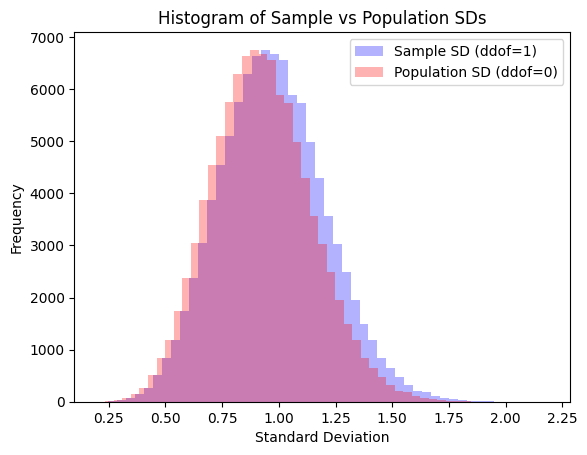

In [288]:
# Plot histograms
plt.hist(sample_sd, bins=50, alpha=0.3, label='Sample SD (ddof=1)', color='blue')
plt.hist(population_sd, bins=50, alpha=0.3, label='Population SD (ddof=0)', color='red')

# Add labels and legend
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Sample vs Population SDs')
plt.legend()

# Show plot
plt.show()

**Differences** https://uedufy.com/population-vs-sample-standard-deviation-formula/

The histogram plot of the sample standard deviation (ddof=1) and the population standard deviation (ddof=0) shows two bell-shaped distributions. The histograms nearly overlap, but the population SD values are slightly smaller on average than the sample SD values, so its histogram is slightly shifted to the left.

**Why this happens**

The formulas to calculate the standard deviation for the population SD and sample SD are almost identical.

1. Calcualte the mean of the samples.
2. Minus the mean from each value to obtain deviations from the mean.
3. Square each deviation
4. Add together all the squared deviations

Now this is where they differ, when calculating the population standard deviation, it is divided by N, the number of data values

When calculating the sample standard deviation, it is divided by N-1, one less than the number of data values.

![alt text](image-17.webp)





When the ddof=0 (Population SD) the formula used is known as the population standard deviation (divide by N which is 10 for the sample problem).
When ddof=1 (Sample SD) the formula used is known as the sample standard deviation or Bessel's correction (divide by N - 1, so 10-1=9).

This explains why the values for the sample SD are higher than the Population SD as the denominator (9) is smaller. This in turn shifts the histogram to the left.

If the sample size was to increase, say 10 to 100, the expectation would be that both histograms would begin to overlap even more as the difference between N and N-1 becomes less. At a sample size of 1000 the both histograms would completely converge as the difference between N and N-1 becomes negligible.

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0 , 0.1 , 0.2 , … , 1.0 , repeat the following simulation 1,000 times:

    Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
    Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
    Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d , and explain how the type II error rate changes as the difference in means increases.

Mean differences: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Proportion NOT rejected: [np.float64(0.957), np.float64(0.893), np.float64(0.69), np.float64(0.437), np.float64(0.207), np.float64(0.053), np.float64(0.012), np.float64(0.002), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


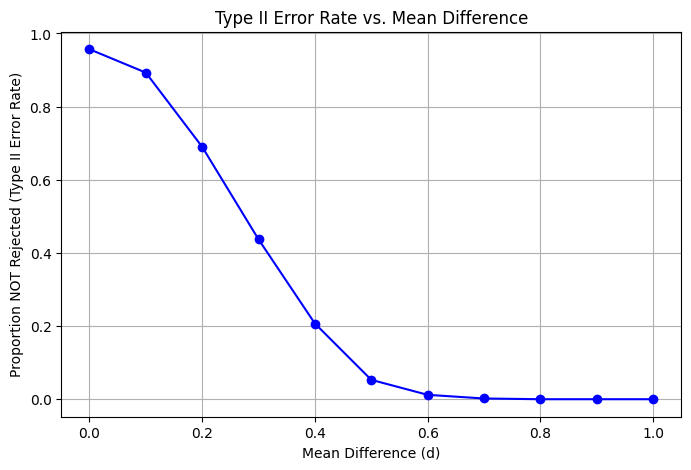

In [289]:
import scipy.stats as stats

mean_range = np.arange(0, 1.1, 0.1) # https://numpy.org/doc/2.3/reference/generated/numpy.arange.html np.arrange([start, ]stop, [step, ]) returns evenely spaced values in a given interval
results = [] # stores in a list the proprtion of times the null hypothesis is not rejected for each d

for d in mean_range: # for each d, generate 2 sets of random data
    sample_1 = np.random.normal(loc=0, scale=1, size=(1000, 100))
    sample_2 = np.random.normal(loc=d, scale=1, size=(1000, 100))

    # Perform 1000 t-tests (one per row)
    p_values = [] # stores p-values from each t-test
    for i in range(1000): # loops over each row
        _, p = stats.ttest_ind(sample_1[i], sample_2[i], equal_var=True) # performs independant t test on two arrays of lenrth 100, igoner t_statistic value
        p_values.append(p) # adds p_values to the p_values = [] list

    p_values = np.array(p_values) #converts list to numpy array

    # Count number of p-values ≥ 0.05
    count_not_rejected = np.sum(p_values >= 0.05) # counts the number of p-values that are equal to or bigger than 0.05, np.sum counts how many times this is tue https://numpy.org/doc/2.1/reference/generated/numpy.sum.html 

    # Proportion of times null is not rejected
    proportion_not_rejected = count_not_rejected / len(p_values) # count not rejected over the total number of tests i.e 1000

    # Store result
    results.append(proportion_not_rejected) # stores proportion to rejected in the results = [] lists

print("Mean differences:", mean_range)
print("Proportion NOT rejected:", results)


plt.figure(figsize=(8,5))
plt.plot(mean_range, results, marker='o', linestyle='-', color='blue')
plt.xlabel("Mean Difference (d)")
plt.ylabel("Proportion NOT Rejected (Type II Error Rate)")
plt.title("Type II Error Rate vs. Mean Difference")
plt.grid(True)
plt.show()